# Grid Search

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import pipeline
from sklearn import svm
from sklearn import preprocessing

In [3]:
X, y = datasets.load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

In [5]:
pipe_svc = pipeline.make_pipeline(preprocessing.StandardScaler(),
                         svm.SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

In [13]:
gs = model_selection.GridSearchCV(estimator=pipe_svc, iid=False, param_grid=param_grid, 
                    return_train_score=False, scoring=['accuracy', 'precision'], cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

ValueError: For multi-metric scoring, the parameter refit must be set to a scorer key or a callable to refit an estimator with the best parameter setting on the whole data and make the best_* attributes available for that metric. If this is not needed, refit should be set to False explicitly. True was passed.

In [7]:
gs.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_svc__C', 'param_svc__kernel', 'param_svc__gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [8]:
len(gs.cv_results_.keys())

21

In [12]:
df = pd.DataFrame(gs.cv_results_)
df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__kernel,param_svc__gamma,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
64,0.007284,0.003420,0.001036,0.000453,1000,rbf,0.0001,"{'svc__C': 1000.0, 'svc__gamma': 0.0001, 'svc_...",1.000000,0.976744,...,0.953488,1.000000,1.000000,1.000000,0.953488,0.975610,0.975610,0.981168,0.017469,1
57,0.006476,0.002086,0.001511,0.000971,100,rbf,0.001,"{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__k...",1.000000,0.976744,...,0.953488,1.000000,1.000000,1.000000,0.953488,0.975610,0.951220,0.978729,0.019643,2
3,0.003744,0.000457,0.000770,0.000073,0.1,linear,NaN,"{'svc__C': 0.1, 'svc__kernel': 'linear'}",1.000000,0.976744,...,0.953488,0.976744,1.000000,0.976744,0.953488,0.975610,0.975610,0.976517,0.014715,3
50,0.004332,0.000483,0.000775,0.000128,10,rbf,0.01,"{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__ker...",1.000000,0.976744,...,0.906977,1.000000,1.000000,1.000000,0.953488,1.000000,0.951220,0.976517,0.029603,4
4,0.010897,0.014741,0.000698,0.000090,1,linear,NaN,"{'svc__C': 1.0, 'svc__kernel': 'linear'}",1.000000,0.976744,...,0.906977,1.000000,1.000000,1.000000,0.953488,0.951220,0.951220,0.971639,0.029350,5
49,0.005042,0.000510,0.001069,0.000502,10,rbf,0.001,"{'svc__C': 10.0, 'svc__gamma': 0.001, 'svc__ke...",1.000000,0.976744,...,0.953488,0.976744,1.000000,0.976744,0.953488,0.975610,0.902439,0.969200,0.026677,6
56,0.010593,0.006718,0.002138,0.002593,100,rbf,0.0001,"{'svc__C': 100.0, 'svc__gamma': 0.0001, 'svc__...",1.000000,0.976744,...,0.953488,0.976744,1.000000,0.976744,0.953488,0.975610,0.902439,0.969200,0.026677,6
66,0.006131,0.001310,0.000829,0.000186,1000,rbf,0.01,"{'svc__C': 1000.0, 'svc__gamma': 0.01, 'svc__k...",1.000000,0.953488,...,0.930233,0.953488,0.976744,0.976744,0.930233,1.000000,0.975610,0.967328,0.023674,8
65,0.006631,0.001915,0.000934,0.000566,1000,rbf,0.001,"{'svc__C': 1000.0, 'svc__gamma': 0.001, 'svc__...",1.000000,0.976744,...,0.930233,0.976744,1.000000,0.976744,0.953488,0.951220,0.951220,0.966988,0.021628,9
2,0.004400,0.001077,0.001080,0.000436,0.01,linear,NaN,"{'svc__C': 0.01, 'svc__kernel': 'linear'}",0.976744,0.976744,...,0.953488,0.976744,0.976744,0.953488,0.953488,0.975610,0.926829,0.964663,0.016296,10


In [10]:
df.shape

(72, 21)

In [9]:
gs = model_selection.GridSearchCV(estimator=pipe_svc, iid=False, param_grid=param_grid, 
                    return_train_score=True, scoring='accuracy', cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9811684628474193
{'svc__C': 1000.0, 'svc__gamma': 0.0001, 'svc__kernel': 'rbf'}


In [10]:
gs.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_svc__C', 'param_svc__kernel', 'param_svc__gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [11]:
len(gs.cv_results_.keys())

33

In [12]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__kernel,param_svc__gamma,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009835,0.003361,0.001238,0.000218,0.0001,linear,NaN,"{'svc__C': 0.0001, 'svc__kernel': 'linear'}",0.651163,0.627907,...,0.637076,0.637076,0.642298,0.639687,0.637076,0.639687,0.638961,0.641558,0.639279,0.001722
1,0.005460,0.000794,0.001004,0.000370,0.001,linear,NaN,"{'svc__C': 0.001, 'svc__kernel': 'linear'}",0.883721,0.953488,...,0.932115,0.926893,0.926893,0.932115,0.934726,0.926893,0.929870,0.937662,0.931140,0.003586
2,0.004352,0.000547,0.000819,0.000096,0.01,linear,NaN,"{'svc__C': 0.01, 'svc__kernel': 'linear'}",0.976744,0.976744,...,0.966057,0.968668,0.966057,0.966057,0.966057,0.968668,0.968831,0.971429,0.967133,0.003567
3,0.003860,0.000675,0.001052,0.001075,0.1,linear,NaN,"{'svc__C': 0.1, 'svc__kernel': 'linear'}",1.000000,0.976744,...,0.984334,0.984334,0.981723,0.979112,0.981723,0.986945,0.981818,0.981818,0.982264,0.002272
4,0.004547,0.000345,0.000644,0.000105,1,linear,NaN,"{'svc__C': 1.0, 'svc__kernel': 'linear'}",1.000000,0.976744,...,0.992167,0.989556,0.986945,0.992167,0.992167,0.994778,0.992208,0.992208,0.991131,0.002093
5,0.007486,0.002098,0.000683,0.000116,10,linear,NaN,"{'svc__C': 10.0, 'svc__kernel': 'linear'}",1.000000,0.953488,...,0.992167,0.997389,0.992167,0.994778,0.994778,0.994778,0.994805,0.992208,0.994002,0.001669
6,0.012539,0.005923,0.000492,0.000104,100,linear,NaN,"{'svc__C': 100.0, 'svc__kernel': 'linear'}",0.953488,0.953488,...,1.000000,1.000000,0.997389,0.997389,0.997389,1.000000,1.000000,1.000000,0.998695,0.001305
7,0.017136,0.010562,0.000542,0.000114,1000,linear,NaN,"{'svc__C': 1000.0, 'svc__kernel': 'linear'}",0.953488,0.953488,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.009478,0.001158,0.001316,0.000207,0.0001,rbf,0.0001,"{'svc__C': 0.0001, 'svc__gamma': 0.0001, 'svc_...",0.627907,0.627907,...,0.629243,0.629243,0.629243,0.629243,0.629243,0.629243,0.628571,0.628571,0.629109,0.000269
9,0.012073,0.008626,0.001276,0.000145,0.0001,rbf,0.001,"{'svc__C': 0.0001, 'svc__gamma': 0.001, 'svc__...",0.627907,0.627907,...,0.629243,0.629243,0.629243,0.629243,0.629243,0.629243,0.628571,0.628571,0.629109,0.000269


## Algorithm selection with nested cross-validation

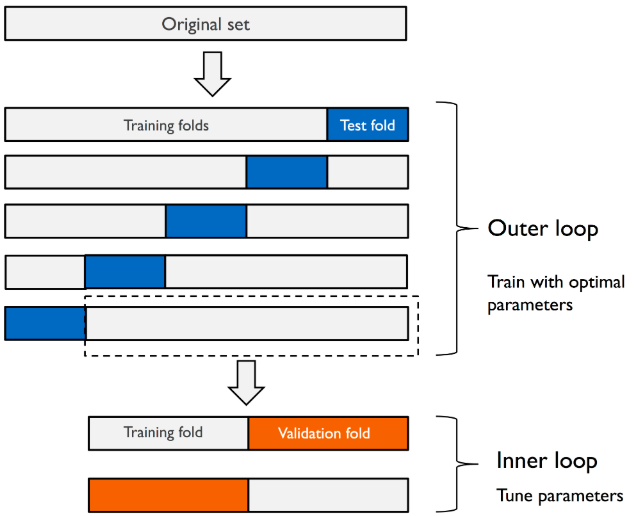

In [13]:
gs = model_selection.GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=2, iid=False)

scores = model_selection.cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print(scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

[0.98837209 0.96511628 0.98837209 0.96428571 0.97619048]
CV accuracy: 0.976 +/- 0.011
